In [1]:
include("ChaosFunctions.jl")
using Plots
include("BasisFunctionTypes.jl")
include("Place.jl")

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1278
┌ Warning: Module Latexify with build ID 978339887584 is missing from the cache.
│ This may mean Latexify [23fbe1c1-3f47-55db-b15f-69d7ec21a316] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1017
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for ParameterizedFunctions [65888b18-ceab-5e60-b2b9-181511a3b968]
│   exception = Required dependency GeneralizedGenerated [6b9d7cbe-bcb9-11e9-073f-15a7a543e2eb] failed to load from a cache file.
└ @ Base loading.jl:1042
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
│   exception = ErrorException("Required dependency MultiScaleArrays [f9640e96-87f6-5992-9c3b-0743c6a49ffa] failed to load from a cache file.")
└ @ Base loading.jl:1042


Main.Place

In [2]:
z=lorenzpoints(5000,0.05)
plot(z[1,:],z[2,:],z[3,:])

ErrorException: could not load library "libGR.so"
libGR.so: cannot open shared object file: No such file or directory

In [3]:
zn=addnoise(z,0.05)
plot(z[1,:]
plot!(zn[1,:],linetype=:dots,markersize=0.5)

LoadError: syntax: missing comma or ) in argument list

In [4]:
#need to make these variables in scope of the current WS
nx=Int64(length(z))
mss=Float64(Inf)
λ=Array{Float64,1}[]
δ=Array{Float64,1}[]
#valid penalty criteria
Schwarz = :(nx*log(mss)+nk*log(nx))
Akaike = :(nx*log(mss)+2*nk)
Rissanen = :(description(mss,λ,δ,nx)) #Rissanen desciption length
Model30 = :(-nk*(nk<=30))
#nx is # of observation (length of data)
#nk is # of parameters (basis functions in model)
#mss is the mean-sum-square model prediction error
#λ are the model parameters and δ their precisions

:(-nk * (nk <= 30))

In [5]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => Place.vembed([0,3,6,9,12,18,24]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nbasis" => 1000,
    "nneighbours"=> 1
    )

Dict{String,Any} with 7 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "nbasis"      => 1000
  "embedding"   => ([0], [3], [0, 3], [6], [0, 6], [3, 6], [0, 3, 6], [9], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

First, build the model

In [6]:
yn=zn[1,:]
mymodel, X, zout, mdlv = Place.buildmodel(yn,options)
plot(mdlv)

dx=25, nx=4477
needδ=true
*MSS=5.267904999709929 DL=10076.143668598308 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=3.8633798325802786 DL=9387.389549697597 size=2
*MSS=3.589525203931627 DL=9228.109869473423 size=3
*MSS=3.5565876840176265 DL=9213.294253298433 size=4
*MSS=3.5333854592385956 DL=9204.725352298512 size=5
*MSS=3.1083412609320225 DL=8917.744554879206 size=5
*MSS=3.0959196058357135 DL=8915.063282258772 size=6
*MSS=3.036166199206245 DL=8870.737250017608 size=6
MSS=3.0352723488346505 DL=8876.771074907549 size=7
*MSS=2.9932789787172447 DL=8845.020271213083 size=7
MSS=2.992393896251533 DL=8851.162956324955 size=8
*MSS=2.735755433574057 DL=8647.058983838038 size=8
*MSS=2.66302972531517 DL=8586.579386355521 size=8
*MSS=2.652596909185308 DL=8584.516554520145 size=9
MSS=2.6499376095461864 DL=8588.84155595982 size=10
MSS=2.649433127125167 DL=8588.154315693258 size=10
MSS=2.6468806365464803 DL=8592.566966193795 size=11
MSS=2.6462220605326685 DL=8591.847039543

MSS=1.309897690550937 DL=7344.4102574929975 size=69
MSS=1.309874263665866 DL=7351.063161207637 size=70
*MSS=1.287352974503515 DL=7310.207790331666 size=70
*MSS=1.2872956504136364 DL=7309.5982395986675 size=70
*MSS=1.2872821003425503 DL=7309.591005864003 size=70
*MSS=1.2821274156511029 DL=7302.0524791194575 size=70
*MSS=1.2703436136174622 DL=7279.177677344393 size=70
MSS=1.2702915666896237 DL=7286.759831513467 size=71
MSS=1.2702444088409857 DL=7293.247012171909 size=72
MSS=1.2646877329221886 DL=7285.977785213304 size=72
MSS=1.2646556642176372 DL=7293.26293351687 size=73
MSS=1.2602284203664325 DL=7281.6824391121545 size=73
MSS=1.2602078934636205 DL=7288.549838953092 size=74
*MSS=1.2535333894312197 DL=7273.987479780225 size=74
MSS=1.2535321495146863 DL=7275.018103825609 size=74
MSS=1.253496062949127 DL=7280.753936938964 size=75
MSS=1.253471615862355 DL=7288.295880125646 size=76
*MSS=1.243707601512576 DL=7266.082873137998 size=76
MSS=1.2436740510404287 DL=7272.688402444303 size=77
MSS=1.24

ErrorException: could not load library "libGR.so"
libGR.so: cannot open shared object file: No such file or directory

In [7]:
yp, yt = Place.freerun(mymodel,yn,5000)
plot(yt)
plot!(yp,xlimit=(0,5000))

ErrorException: could not load library "libGR.so"
libGR.so: cannot open shared object file: No such file or directory

In [8]:
mymodel

Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(gaussian, [3], 2.456714233762623, [1.365330550523041 -8.443050193729595 … -3.488149490890973 -10.762648884089142], Any[]), Main.Place.BasisFunc(tophat, [3], 7.678813560624371, [1.365330550523041 -8.443050193729595 … -3.488149490890973 -10.762648884089142], [3.878805296570247]), Main.Place.BasisFunc(tophat, [0, 6], 15.07686593594511, [11.338419324228711 -6.0292291651128735 … -13.541481204342618 -11.576412735539344; 1.0764574432472795 -10.466197982179654 … -2.3559893275721895 -4.1916000341579105], [4.233737152848496]), Main.Place.BasisFunc(gaussian, [0, 12], 10.646148192723635, [11.338419324228711 -6.0292291651128735 … -13.541481204342618 -11.576412735539344; -5.581416370989604 -7.134913445216988 … -6.262888477923216 -6.744904697863052], Any[]), Main.Place.BasisFunc(tophat, [0, 3, 12], 17.430469449258986, [11.338419324228711 -6.0292291651128735 … -13.541481204342618 -11.576412735539344; 1.365330550523041 -8.443050193729595 …

Assuming we want to use yn as the trajectory, and the closest basis functions from mymodel to map to nodes in the network, we first need to construct an embedding of yn in the appropriate embedding dimension - which is determined by mymodel.embedv

In [9]:
X,z,Xp,zp=Place.embedding(yn,mymodel.embedv)

([-10.526656528801247 -10.205507905084731 … 4.074608861331473 2.6977614942457473; -9.27488959998699 -10.526656528801247 … 6.007330947055739 4.074608861331473; … ; -9.894515382812752 -9.373277254470274 … 5.845486479918418 5.376889377584302; -9.501996299754909 -9.894515382812752 … 5.653788329778608 5.845486479918418], [-10.205507905084731, -9.983575152842576, -9.531917221916686, -7.930266439587886, -7.41864418974709, -7.551101658276485, -6.940261185517281, -7.171602710921703, -7.503477981439884, -9.579155909047662  …  10.473580333571702, 11.071922326585101, 12.459059548584223, 11.998575348789377, 9.786617876341392, 7.971243461278631, 6.007330947055739, 4.074608861331473, 2.6977614942457473, 3.9211987300338804], Any[], Any[])

In [10]:
size(X)


(25, 4976)

In [11]:
size(mymodel.rbf)

(56,)

To see which basis function centre is closest to each embedded time point, we simply evaluate the embedded points at every basis function - for Gaussian (and tophat) basis functions that are monotonically decreasing this will give us a handy measure of "distance" from each centre, normalised by radius. Even for other non-monotonic basis functions this is probably a reasonable generalisation. Probably handy to assume that the maximum at 0 is the same across all basis functions. 

Anyway, evaluate the data at all the basis functions...

In [12]:
ϕ,offset = Place.placebo(X,mymodel.rbf,false,false)

([0.013155217330212483 0.8134670269812339 … 0.05006672129546473 0.07829764282375802; 0.009032843703727757 0.7845689944600298 … 0.0546748715235423 0.01306167340737846; … ; 3.2900829994622494e-13 0.00030120820800618765 … 0.1573491240322255 2.4507938493860056e-26; 5.261438637145341e-10 0.010450178910412026 … 0.22306863604835955 1.2521043826022857e-37], 0)

And then find the maximal ones (this technique will not handle ties, but lets assume that that is not a problem for now...)

In [13]:
indx=argmax(ϕ,dims=2)
nodes=[i[2] for i in indx]

4976×1 Array{Int64,2}:
 36
 36
 36
 36
 36
 36
 36
 36
 36
 36
 36
 36
 36
  ⋮
 30
 41
 30
  4
  4
  4
 19
 19
 19
 26
 29
 41

In [14]:
histogram(nodes)

ErrorException: could not load library "libGR.so"
libGR.so: cannot open shared object file: No such file or directory

Now we just need to build a network from this node sequence...

In [15]:
using LightGraphs, SimpleWeightedGraphs, GraphPlot

In [16]:
g=SimpleWeightedDiGraph(length(mymodel.rbf))

{56, 0} directed simple Int64 graph with Float64 weights

In [17]:
nd=length(nodes)
for i in 2:nd
    add_edge!(g,nodes[i-1],nodes[i],weights(g)[nodes[i-1],nodes[i]]+1)
end

In [18]:
A=Array(g.weights)

56×56 Array{Float64,2}:
 0.0    1.0  0.0   0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  535.0  0.0   0.0  0.0  0.0  8.0     0.0  0.0  0.0  0.0  0.0  2.0  0.0
 0.0    2.0  1.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    0.0  0.0  21.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    0.0  0.0   0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0   13.0  0.0   0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  3.0
 0.0    0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    0.0  0.0   0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0    0.0  0.0   0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.

In [19]:
am=A+A'
pg=Graph(am)
pgis=connected_components(pg)
pgi=pgis[argmax(length.(pgis))] #usually [1] is the largest connected component...


29-element Array{Int64,1}:
  1
  2
  3
  4
  7
  8
 10
 14
 15
 16
 19
 21
 22
  ⋮
 32
 33
 34
 35
 36
 41
 42
 45
 46
 54
 55
 56

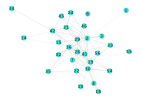

In [20]:
gplot(pg[pgi],nodelabel=pgi,edgelinewidth=log.(am[am.>0]).+1) #not sure that the weights are in the right order...